In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt 
import numpy as np 
from preprocessing import *

In [2]:
audio_files = [r"E:\Sample library\Mugg Essentials\EX_OS_130_drums_loop_molten.wav",
               r"E:\Sample library\Mugg Essentials\loops\OS_SS_108_Chords_Cm_Regrets_Piano.wav",
               r"E:\Sample library\Mugg Essentials\loops\SPS_95_reverse_piano_ghost_encounter_Gm.wav",
               r"E:\Sample library\Mugg Essentials\Kicks\SNS_TD_kick_blip.wav",
               r"E:\Sample library\Mugg Essentials\Kicks\OS_TD_Neve_Kick.wav",
               r"E:\Sample library\Mugg Essentials\Snare\MURDA_snare_kali.wav",
               r"E:\Sample library\Mugg Essentials\808\MURDA_808_TRUNK_C.wav"]

In [3]:
sr = 44100
duration = 8
mono = True
# Tells us how many samples to capture in each frame
frame_size = 2048
# determines how many samples to shift to the right to capture a new frame
hop = 512
expected_samples = duration * sr

In [4]:
mel_spec = LogMelSpectrogramExtractor(frame_size = frame_size, hop_length = hop, rate = sr)
spec = LogSpectrogramExtractor(frame_size, hop)
mfcc = MfccExtractor()
padder = Padder()

def load_audio(files, pad = True):
    # initialize list for audio samples
    audio = []
    # instantiate a loader
    loader = Loader(sample_rate = sr, duration = duration, mono = mono)
    # load each file
    for file in files:
        sample = loader.load(file)
        if pad:
            sample = padding(sample)
            
        audio.append(sample)
    
    return audio

def padding(signal):
    missing_samples = expected_samples - len(signal)
    padded_signal = padder.right_pad(signal, missing_samples)
    return padded_signal

def spectrogram(data, title, sr = 44100, hop = 512, y_axis = "linear"):
    plt.figure(figsize = (25, 10))
    plt.title(title)
    librosa.display.specshow(data, sr = sr, hop_length = hop, x_axis = 'time', y_axis = y_axis)
    plt.colorbar()
    
def extract_all(audio):
    features = {'Spectrogram': spec.extract(audio), 
                'Mel_Spectrogram': mel_spec.extract(audio), 
                'Mfcc': mfcc.extract(audio)}
    return features
 
def show(sample, y_axis):
    spectrogram(sample['Spectrogram'], 'Spectrogram', y_axis = y_axis)
    spectrogram(sample['Mel_Spectrogram'], 'Mel_Spectrogram', y_axis = y_axis)
    spectrogram(sample['Mfcc'], "Mfcc",y_axis = y_axis)

In [5]:
audio = load_audio(audio_files)

In [6]:
audio[1].shape

(352800,)

In [7]:
# extract features 
samples = {}
for index, sample in enumerate(audio):
    samples[index] = extract_all(sample)
       

In [8]:
ipd.Audio(audio[1], rate = sr)

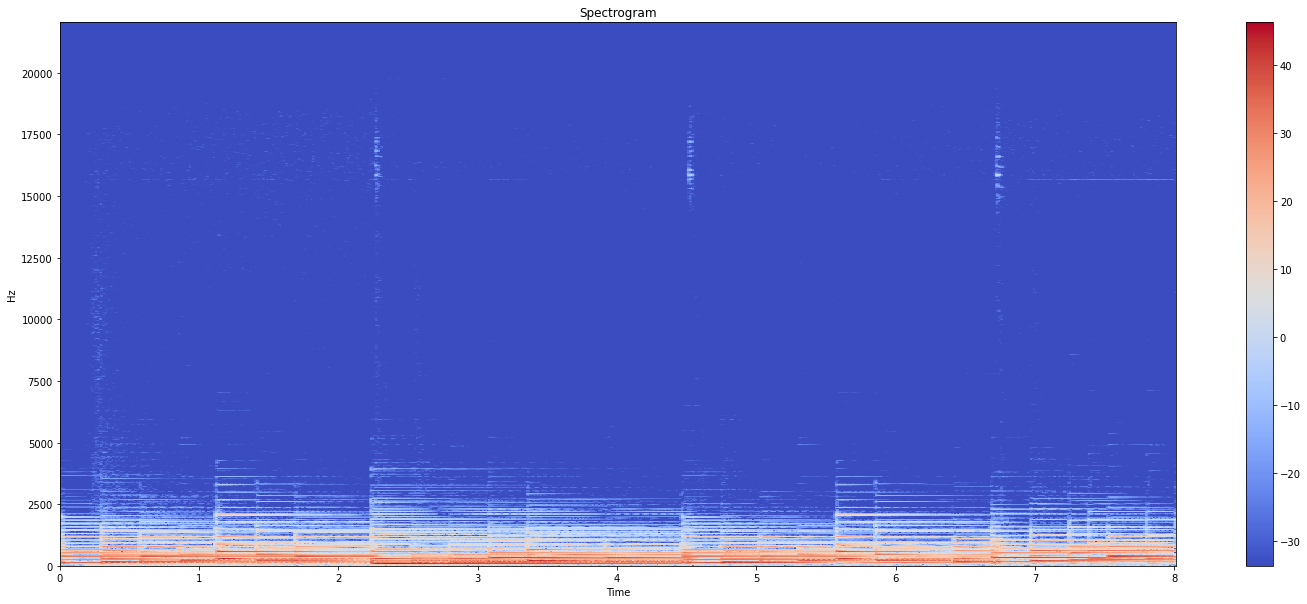

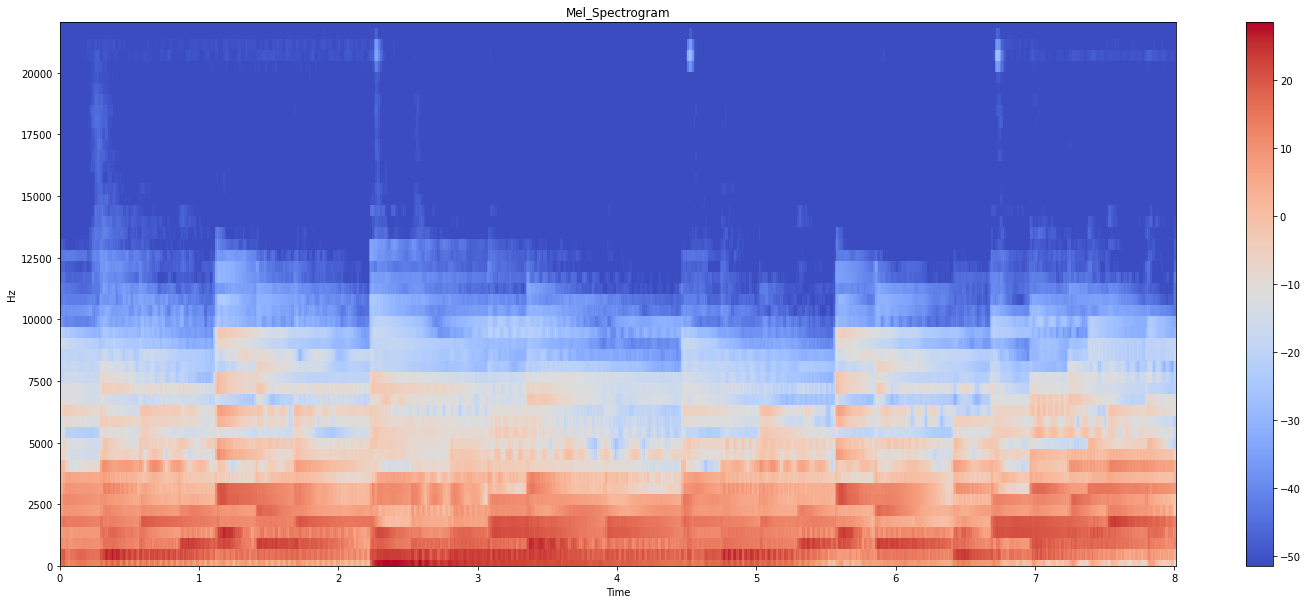

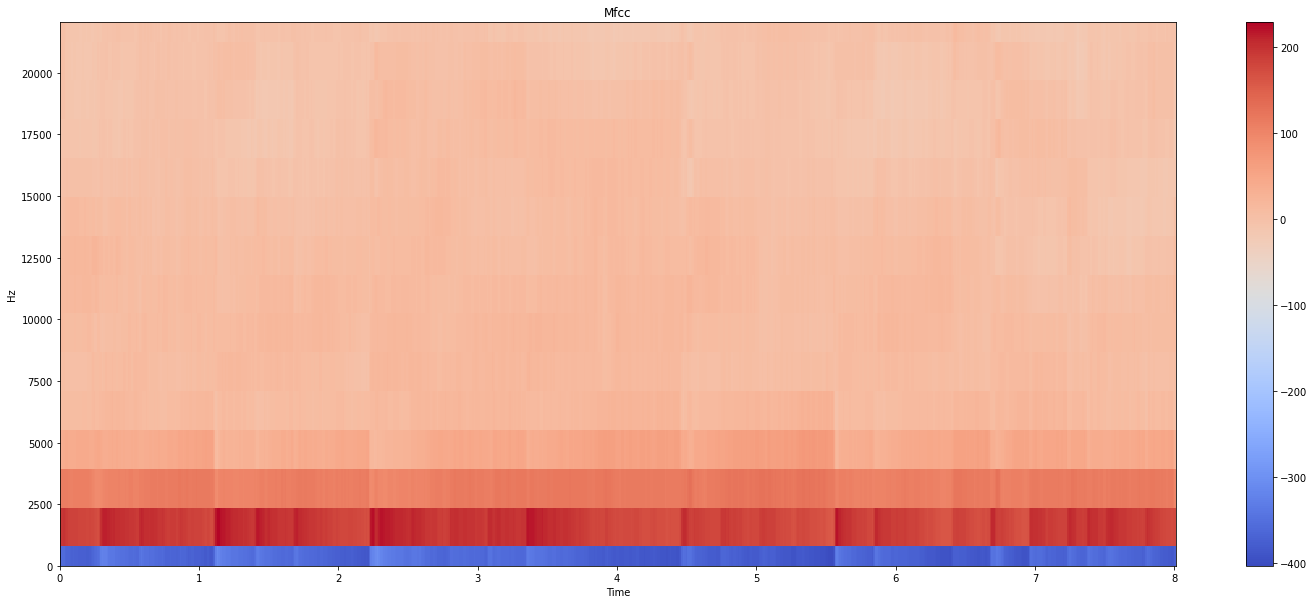

In [9]:
show(samples[1], 'linear')